# Clustering

### 1. 데이터 수집 & 선택

In [36]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

### 2. 데이터 전처리

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. 모델 선택 & 훈련

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#### PCA를 사용해서 차원 감소

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### 5. 결과 확인(시각화)

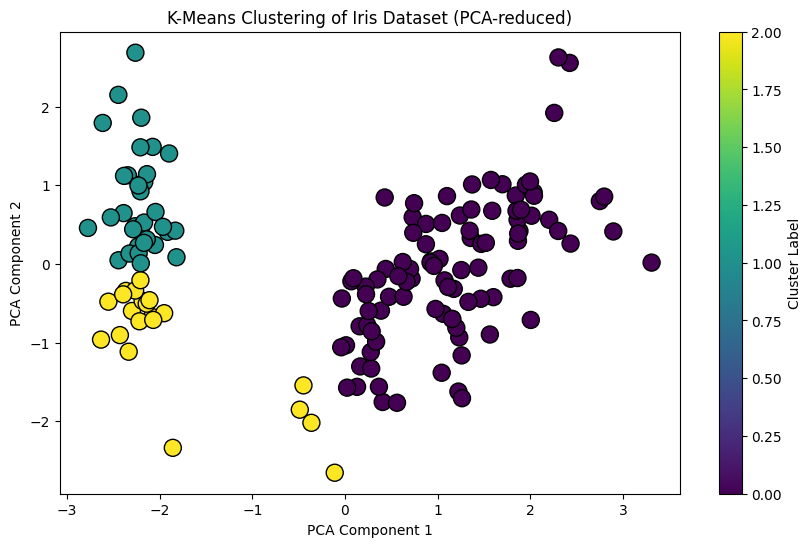

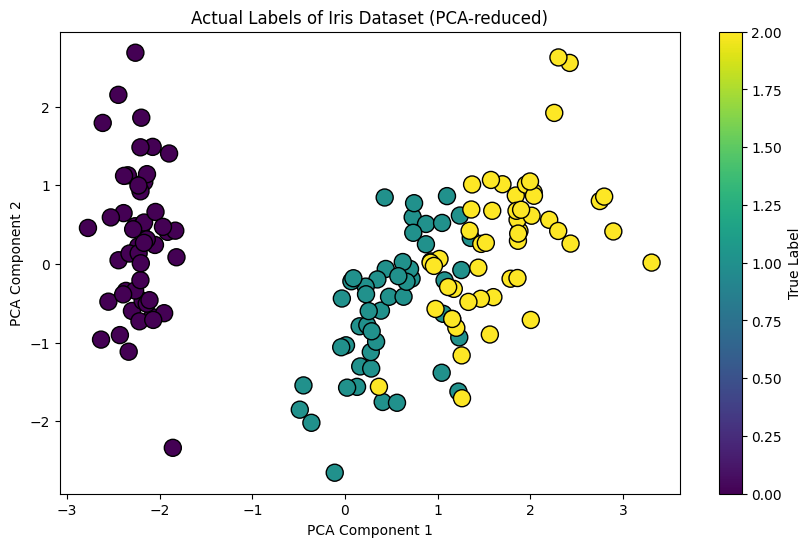

In [40]:
from matplotlib.pyplot import figure

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=150)
plt.title('K-Means Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()

K-Means Silhouette Score: 0.45994823920518635


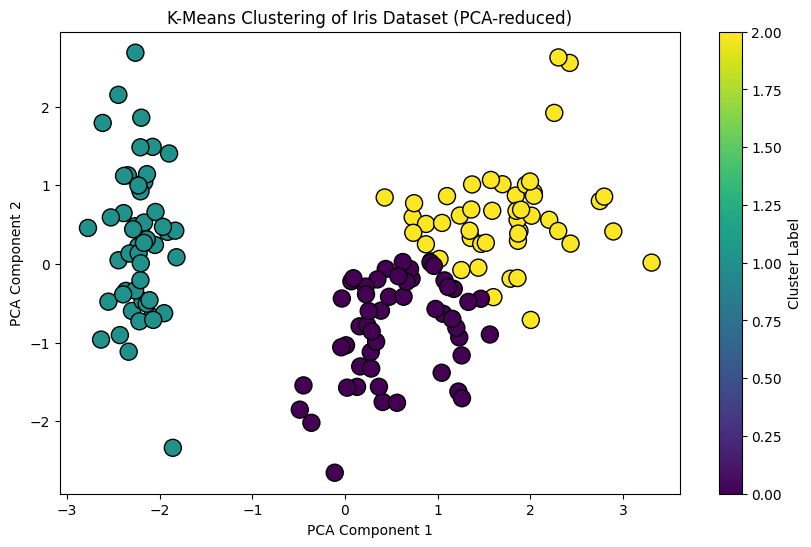

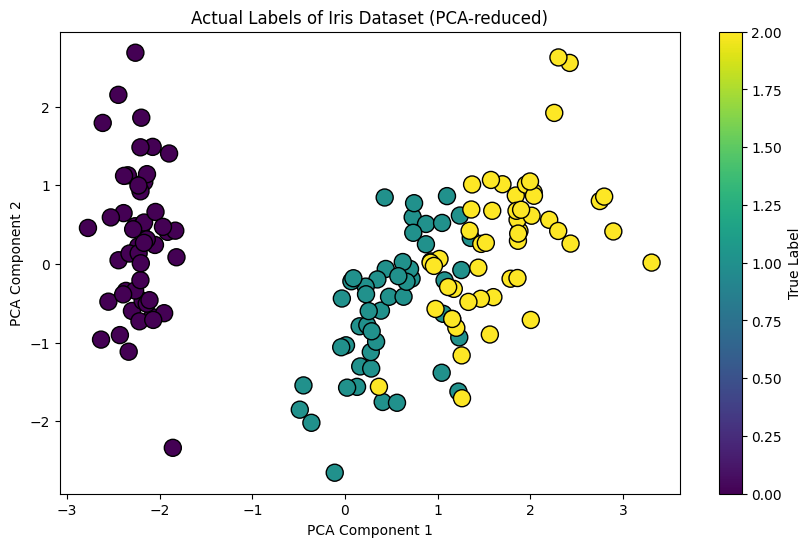

In [41]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means 클러스터링 (n_init 파라미터 조정)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
clusters = kmeans.fit_predict(X_scaled)

# 실루엣 점수 계산
silhouette_kmeans = silhouette_score(X_scaled, clusters)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터링 결과 시각화 (K-Means)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=150)
plt.title('K-Means Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()


Spectral Clustering Silhouette Score: 0.4593010216876192


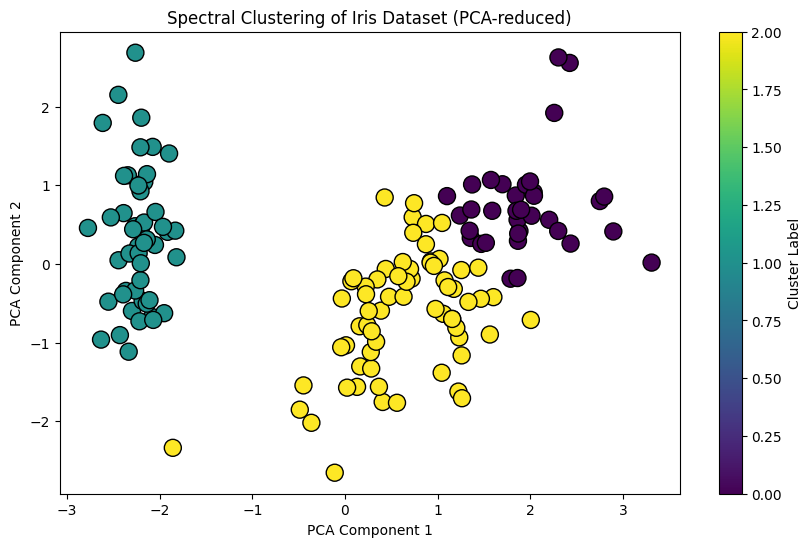

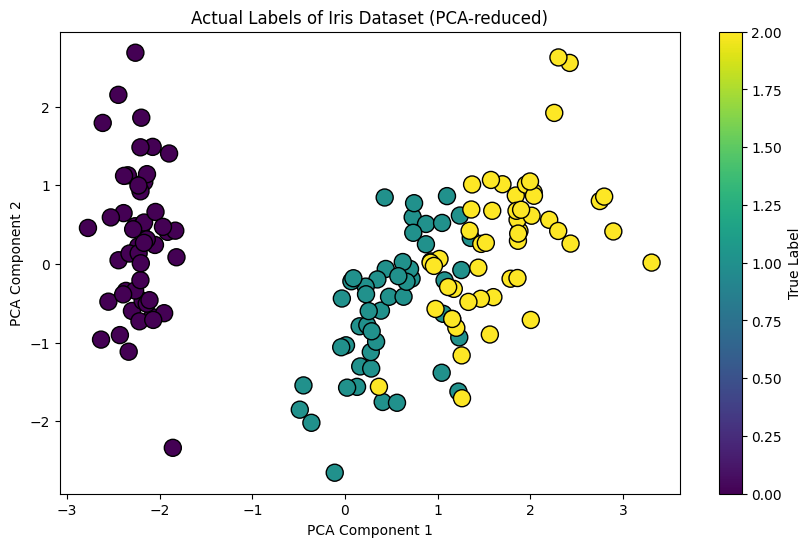

In [42]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')
clusters = spectral.fit_predict(X_scaled)

# 실루엣 점수 계산
silhouette_spectral = silhouette_score(X_scaled, clusters)
print(f"Spectral Clustering Silhouette Score: {silhouette_spectral}")

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터링 결과 시각화 (Spectral Clustering)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=150)
plt.title('Spectral Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()


Ward Clustering Silhouette Score: 0.4466890410285909


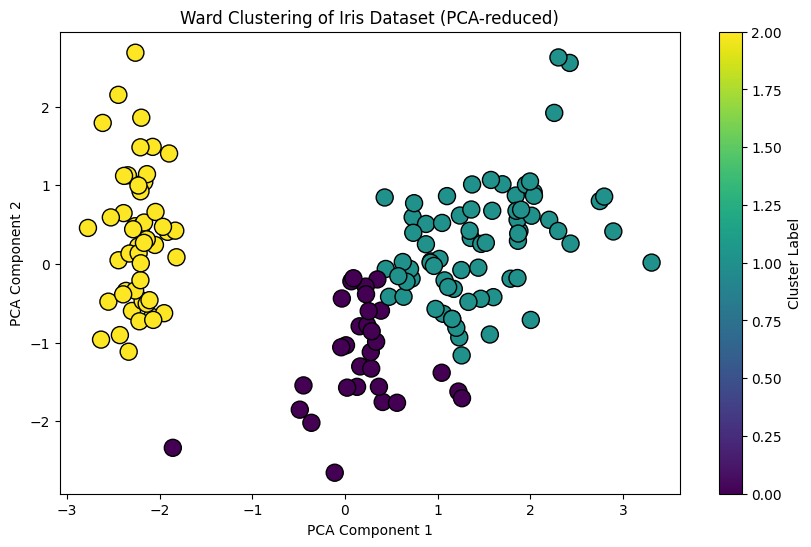

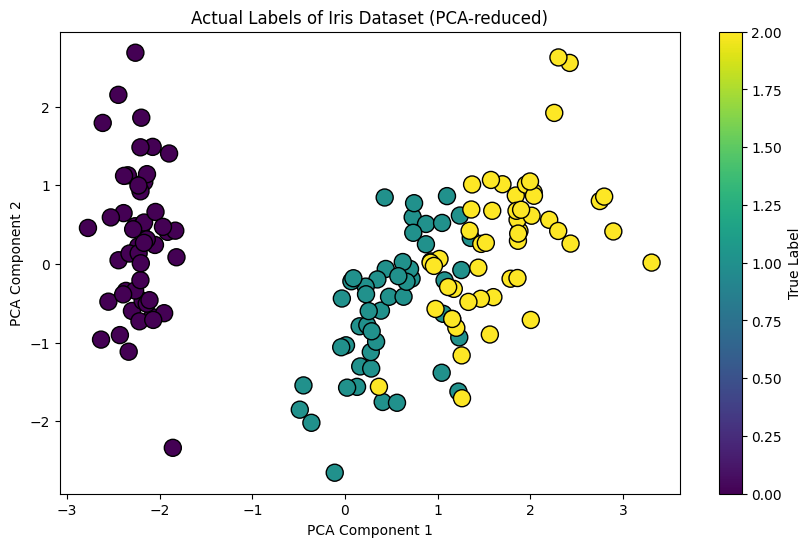

In [43]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.optimize import linear_sum_assignment
import numpy as np

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ward 방식으로 계층적 군집 분석
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = ward.fit_predict(X_scaled)

# 클러스터 라벨을 실제 라벨에 맞게 매핑
def match_labels(true_labels, cluster_labels):
    D = max(cluster_labels.max(), true_labels.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=int)
    for i in range(len(true_labels)):
        cost_matrix[true_labels[i], cluster_labels[i]] += 1
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return col_ind

# 매핑 적용
label_mapping = match_labels(y, clusters)
mapped_clusters = np.array([label_mapping[label] for label in clusters])

# 실루엣 점수 계산
silhouette_ward = silhouette_score(X_scaled, mapped_clusters)
print(f"Ward Clustering Silhouette Score: {silhouette_ward}")

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터링 결과 시각화 (Ward 방식)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mapped_clusters, cmap='viridis', edgecolor='k', s=150)
plt.title('Ward Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()


Best Algorithm: Spectral
Silhouette Score: 0.4593010216876192
Adjusted Rand Index: 0.6464871114465449


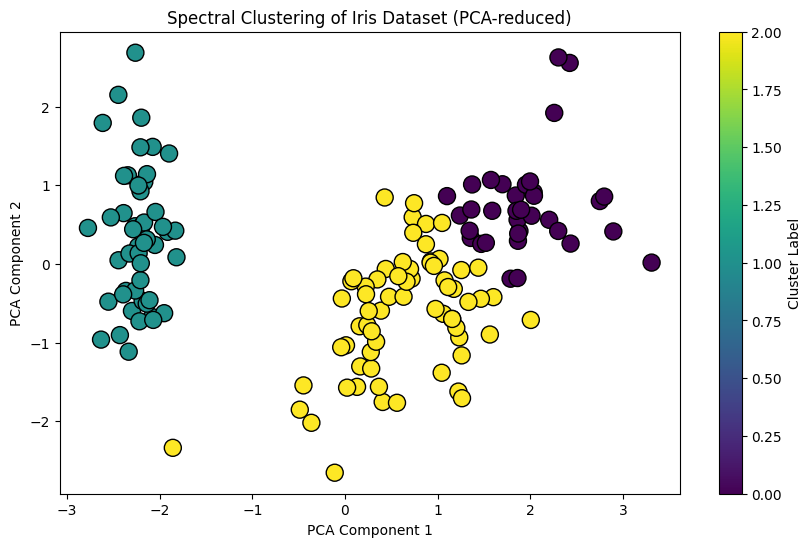

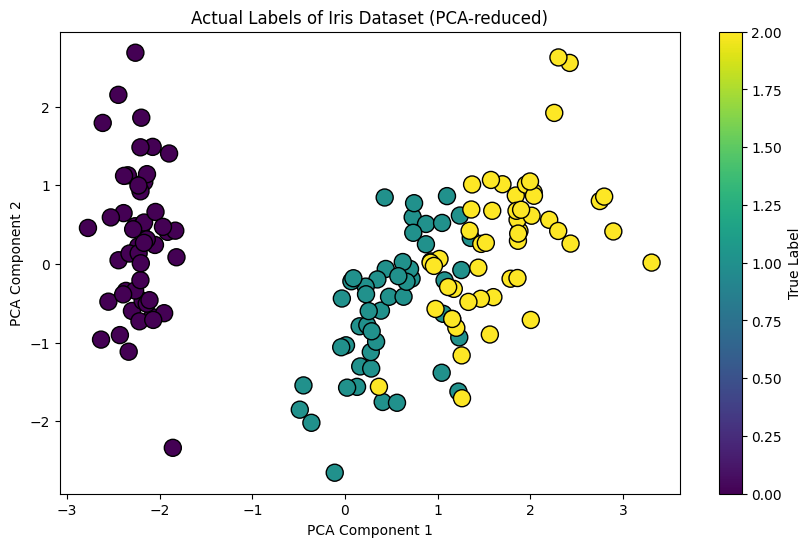

In [47]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링 알고리즘 리스트
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative (Ward)": AgglomerativeClustering(n_clusters=3, linkage='ward'),
    "Spectral": SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors'),
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42),
    "Mean Shift": MeanShift(),
    "DBSCAN": DBSCAN()
}

results = {}

# 알고리즘 적용 및 평가
for name, algorithm in algorithms.items():
    if name == "Gaussian Mixture":
        clusters = algorithm.fit_predict(X_scaled)
    else:
        clusters = algorithm.fit_predict(X_scaled)
        
    # 성능 평가
    silhouette = silhouette_score(X_scaled, clusters)
    ari = adjusted_rand_score(y, clusters)
    
    # 결과 저장
    results[name] = {
        "clusters": clusters,
        "silhouette": silhouette,
        "ari": ari
    }

# 가장 높은 ARI를 가진 알고리즘 찾기
best_algorithm = max(results, key=lambda x: results[x]["ari"])

print(f"Best Algorithm: {best_algorithm}")
print(f"Silhouette Score: {results[best_algorithm]['silhouette']}")
print(f"Adjusted Rand Index: {results[best_algorithm]['ari']}")

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터링 결과 시각화 (Best Algorithm)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=results[best_algorithm]['clusters'], cmap='viridis', edgecolor='k', s=150)
plt.title(f'{best_algorithm} Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()
